In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [10]:
df = pd.read_csv('data.csv')
df.head()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


In [16]:
df.drop('Country',axis=1)


,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,34.39,31.91,34.32,23.80,43.50,31.16,41.79,26.75,28.23,32.07,44.38,26.32,48.46
163,34.18,20.93,31.02,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
164,32.83,35.30,36.83,28.40,36.72,26.32,40.21,25.49,40.34,19.21,31.95,18.62,54.57
165,32.65,22.60,25.30,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49


In [19]:
features = ['SafetySecurity', 'Governance', 'SocialCapital']  
data = df[features]

In [20]:
data = data.dropna()

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [22]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


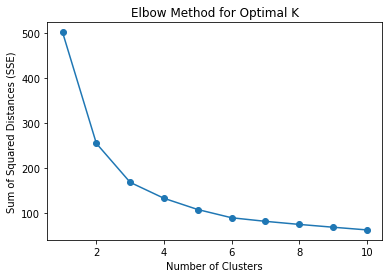

In [23]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [24]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)


data['Cluster'] = clusters


print(data.head())

   SafetySecurity  Governance  SocialCapital  Cluster
0           92.59       89.45          82.56        0
1           90.97       86.41          78.29        0
2           93.30       89.66          79.03        0
3           89.56       90.41          77.27        0
4           95.66       87.67          69.14        0


# Pyspark Implementation

In [25]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import col

In [26]:
spark = SparkSession.builder \
    .appName("KMeansClustering") \
    .getOrCreate()

In [27]:
data = spark.read.csv('data.csv', header=True, inferSchema=True)


In [28]:
data.show()

+---------------+-----------+--------------+---------------+----------+-------------+---------------------+--------------------+--------------------------+---------------+----------------+------+---------+------------------+
|        Country|AveragScore|SafetySecurity|PersonelFreedom|Governance|SocialCapital|InvestmentEnvironment|EnterpriseConditions|MarketAccessInfrastructure|EconomicQuality|LivingConditions|Health|Education|NaturalEnvironment|
+---------------+-----------+--------------+---------------+----------+-------------+---------------------+--------------------+--------------------------+---------------+----------------+------+---------+------------------+
|        Denmark|      84.55|         92.59|          94.09|     89.45|        82.56|                82.42|               79.64|                     78.79|          76.81|           95.77| 81.07|    87.48|             73.94|
|         Sweden|      83.67|         90.97|           91.9|     86.41|        78.29|               

In [29]:
features = ['SafetySecurity', 'Governance', 'SocialCapital']  

In [30]:
data = data.select(*features)

In [31]:
assembler = VectorAssembler(inputCols=features, outputCol="features")
data = assembler.transform(data)

In [32]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)
scaler_model = scaler.fit(data)
scaled_data = scaler_model.transform(data)

Error for k=1: KMeans_8ea504e110ee parameter k given invalid value 1.
Error for k=2: 'KMeansModel' object has no attribute 'computeCost'
Error for k=3: 'KMeansModel' object has no attribute 'computeCost'
Error for k=4: 'KMeansModel' object has no attribute 'computeCost'
Error for k=5: 'KMeansModel' object has no attribute 'computeCost'
Error for k=6: 'KMeansModel' object has no attribute 'computeCost'
Error for k=7: 'KMeansModel' object has no attribute 'computeCost'
Error for k=8: 'KMeansModel' object has no attribute 'computeCost'
Error for k=9: 'KMeansModel' object has no attribute 'computeCost'
Error for k=10: 'KMeansModel' object has no attribute 'computeCost'


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

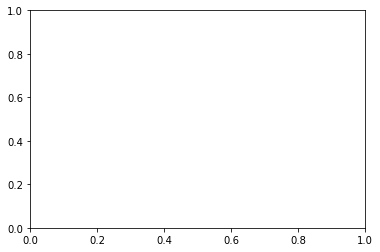

In [34]:

k_values = range(1, 11)
wssse = []

for k in k_values:
    try:
        kmeans = KMeans(k=k, seed=1, featuresCol="scaled_features", predictionCol="cluster")
        model = kmeans.fit(scaled_data)
        wssse.append(model.computeCost(scaled_data))
    except Exception as e:
        print(f"Error for k={k}: {e}")

# Plot WSSSE (within-cluster sum of squared errors) for different k values
plt.plot(k_values, wssse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method for Optimal K in PySpark')
plt.show()


In [35]:
optimal_k = 5  

try:
    kmeans = KMeans(k=optimal_k, seed=1, featuresCol="scaled_features", predictionCol="cluster")
    model = kmeans.fit(scaled_data)
    clusters = model.transform(scaled_data)
    clusters.show()
except Exception as e:
    print(f"Error fitting K-means with k={optimal_k}: {e}")


+--------------+----------+-------------+-------------------+--------------------+-------+
|SafetySecurity|Governance|SocialCapital|           features|     scaled_features|cluster|
+--------------+----------+-------------+-------------------+--------------------+-------+
|         92.59|     89.45|        82.56|[92.59,89.45,82.56]|[5.27810568476285...|      1|
|         90.97|     86.41|        78.29|[90.97,86.41,78.29]|[5.18575736194920...|      1|
|          93.3|     89.66|        79.03| [93.3,89.66,79.03]|[5.31857933241575...|      1|
|         89.56|     90.41|        77.27|[89.56,90.41,77.27]|[5.10538011801880...|      1|
|         95.66|     87.67|        69.14|[95.66,87.67,69.14]|[5.45311145700847...|      1|
|         91.19|     87.34|        74.03|[91.19,87.34,74.03]|[5.19829849220785...|      1|
|         96.32|     86.31|         66.6| [96.32,86.31,66.6]|[5.49073484778440...|      1|
|         91.64|      83.3|        77.75| [91.64,83.3,77.75]|[5.22395080410053...|      1|